In [86]:
# import Pkg
# Pkg.add("CSV")
# Pkg.add("Dates")
# Pkg.add("DataFrames")
# Pkg.add("DataFramesMeta")
# Pkg.add("JuMP")
# Pkg.add("Gurobi")
# Pkg.add("Distances")
# Pkg.add("Random")
# Pkg.add("Distributions")
# Pkg.add("Statistics")
# Pkg.add("Graphs")
# Pkg.add("GraphPlot")
# Pkg.add("GMT")
# Pkg.add("MultiObjectiveAlgorithms")
# Pkg.add("Compose")
# Pkg.add("Cairo")
# Pkg.add("Colors")
# Pkg.add("ColorSchemes")
# Pkg.add("Fontconfig")
# Pkg.add("Leaflet")
# Pkg.add("GeoInterface")
# Pkg.add("GeoJSON")

In [2]:
using Plots
using Compose, Cairo, Fontconfig

In [31]:
include("./src/utils.jl")
include("./src/data.jl")
include("./src/opt.jl")
include("./src/out.jl")
include("./src/lagrange.jl")
include("./src/metrics.jl");

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-23


In [4]:
trips, shapes = loadGTFS("..\\data\\Nanaimo-GTFS");
# trips, shapes = loadGTFS("..\\data\\Cranbrook-GTFS");

In [39]:
# subset = subsetGTFS(trips, 9, randomSeed = 12) # good example
# subset = subsetGTFS(trips, 10, randomSeed = 12) # good example
# subset = subsetGTFS(trips, 20, randomSeed = 2); # good example for mapping
# subset = subsetGTFS(trips, 20; routes = [1, 2, 3, 5, 7, 14, 20], start_time = 8, stop_time = 12, randomSeed = 1)
subset = subsetGTFS(trips; n = 20, routes = [6, 7, 8, 15, 25, 30, 76], start_time = 12, stop_time = 18, randomSeed = 2)
l = primaryDelays(subset; shape = 2)
instance = VSPInstance(subset; l = l)
del_model = VSPModel(instance; numScenarios = 100, split = 0.8, warmStart = false, isInt = true, multiObj = false)
# vsp_model_nonint = VSPModel(instance; isInt = false, multiObj = false)
mcf_model = MCFModel(instance)
del_solution = solve!(del_model);
# vsp_solution_nonint = solve!(vsp_model_nonint)
mcf_solution = solve!(mcf_model);

numTrips = 20
numVehicles = 5.0
isInt = true
termination_status(mod.model) = MathOptInterface.OPTIMAL
objective_value(mod.model) = 569.1046489532745
solve_time(mod.model) = 1.0339999198913574


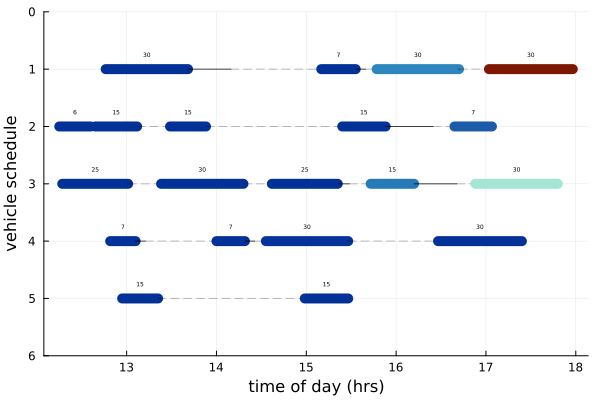

In [40]:
plotVSP_time(mcf_solution; delays = del_model.L_train)

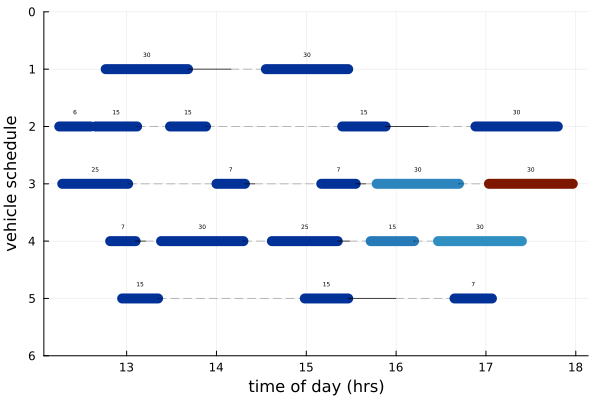

In [41]:
plotVSP_time(del_solution; delays = del_model.L_train)

In [43]:
del_stats = getSolutionStats(del_solution, shapes, del_model.L_train).metrics
mcf_stats = getSolutionStats(mcf_solution, shapes, del_model.L_train).metrics;

In [44]:
mcf_stats[:, Not("geometry")]

Row,duration,num_trips,utilization,propagated_delay,propagated_delay_err,trip_distance,deadhead_distance
,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,5.2,4,0.605769,0.0865778,0.129584,75.265,0.582693
2,4.81667,5,0.439447,0.00625954,0.0176981,65.154,0.527748
3,5.51667,5,0.685801,0.0439718,0.0871485,89.328,0.607626
4,4.58333,4,0.534545,0.00033296,0.00297809,61.096,0.214114
5,2.51667,2,0.350993,0.0,0.0,29.684,0.0


In [45]:
del_stats[:, Not("geometry")]

Row,duration,num_trips,utilization,propagated_delay,propagated_delay_err,trip_distance,deadhead_distance
,Float64,Int64,Float64,Float64,Float64,Float64,Float64
1,2.7,2,0.679012,0.0,0.0,43.996,0.475706
2,5.55,5,0.471472,0.0,0.0,76.329,0.47467
3,5.68333,5,0.577713,0.0865778,0.129584,75.797,0.217259
4,4.58333,5,0.730909,0.0274957,0.0701648,83.898,0.240002
5,4.11667,3,0.31579,0.0,0.0,40.507,0.52657


In [6]:
# draw(PNG(".\\imgs\\VSP-PD-$(instance.n-1)-instance.png", 16cm, 16cm), plotVSP(instance))
# draw(PNG(".\\imgs\\VSP-PD-$(instance.n-1)-mcf_solution.png", 16cm, 16cm), plotVSP(mcf_solution))
# draw(PNG(".\\imgs\\VSP-PD-$(instance.n-1)-mcf_solution.png", 16cm, 16cm), plotVSP(vsp_solution_nonint))

## Leaflet

In [46]:
m = plotVSP_map(del_stats; schedule = nothing)

Leaflet.Map{Vector{Leaflet.Layer}, Leaflet.Config{Leaflet.Provider}, WebIO.Scope}(Leaflet.Layer[Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-123.93122, 49.16462], [-123.93115999999999, 49.16482], [-123.93105, 49.165], [-123.93113, 49.16528], [-123.93128999999999, 49.16543], [-123.93234, 49.16604], [-123.93288, 49.16609], [-123.93332, 49.16595], [-123.93363, 49.16593], [-123.93462, 49.16618]  …  [-124.0479, 49.23287], [-124.04793, 49.23321], [-124.04803, 49.23351], [-124.04799, 49.23454], [-124.04799999999999, 49.2352], [-124.04878, 49.23521], [-124.04936, 49.23491], [-124.04968, 49.23491], [-124.05228, 49.23655], [-124.05296999999999, 49.237049999999996]], nothing, nothing), Dict{Symbol, Any}(:color => "#1F77B4", :border_width => 2, :opacity => 1, :color_map => "nothing", :fill_opacity => 1, :marker_size => 3.0)), Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-124.05296925048827, 49.23705073852539], [-123.93121937255859, 49.16462108154297]], nothing, nothing), Dict{Symbol, Any}(:color => "gray", :border_width => 2, :opacity => 0.5, :color_map => "nothing", :fill_opacity => 0.5, :marker_size => 3.0)), Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-123.93122, 49.16462], [-123.93115999999999, 49.16482], [-123.93105, 49.165], [-123.93113, 49.16528], [-123.93128999999999, 49.16543], [-123.93234, 49.16604], [-123.93288, 49.16609], [-123.93332, 49.16595], [-123.93363, 49.16593], [-123.93462, 49.16618]  …  [-124.0479, 49.23287], [-124.04793, 49.23321], [-124.04803, 49.23351], [-124.04799, 49.23454], [-124.04799999999999, 49.2352], [-124.04878, 49.23521], [-124.04936, 49.23491], [-124.04968, 49.23491], [-124.05228, 49.23655], [-124.05296999999999, 49.237049999999996]], nothing, nothing), Dict{Symbol, Any}(:color => "#1F77B4", :border_width => 2, :opacity => 1, :color_map => "nothing", :fill_opacity => 1, :marker_size => 3.0)), Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-123.93158, 49.16446], [-123.93154, 49.16465], [-123.93136, 49.16482], [-123.93113, 49.16462], [-123.93178, 49.16403], [-123.93208, 49.1641], [-123.93291, 49.16334], [-123.93319, 49.16341], [-123.93478, 49.16319], [-123.93517, 49.16351]  …  [-123.96113, 49.15779], [-123.96115, 49.1592], [-123.9626, 49.15921], [-123.96419, 49.15922], [-123.96679, 49.15924], [-123.96724, 49.15897], [-123.96724, 49.15866], [-123.96671, 49.15812], [-123.9664, 49.15814], [-123.96652, 49.15843]], nothing, nothing), Dict{Symbol, Any}(:color => "#AEC7E8", :border_width => 2, :opacity => 1, :color_map => "nothing", :fill_opacity => 1, :marker_size => 3.0)), Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-123.96652221679688, 49.15842982788086], [-123.96678161621094, 49.158101763916015]], nothing, nothing), Dict{Symbol, Any}(:color => "gray", :border_width => 2, :opacity => 0.5, :color_map => "nothing", :fill_opacity => 0.5, :marker_size => 3.0)), Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-123.96678, 49.1581], [-123.96648, 49.15809], [-123.96677, 49.15858], [-123.96704, 49.15869], [-123.96713, 49.15905], [-123.96679, 49.15924], [-123.96419, 49.15922], [-123.9626, 49.15921], [-123.96119, 49.1592], [-123

## Bender's decomposition

In [9]:
# fs = FirstStageProblem(instance; timeLimit = 10)
# add_benders_callback!(fs)
# bd_solution = solve!(fs);
# @show mean(lp_callback_runtimes)
# @show mean(get_p_callback_runtimes);
# MOI.get(fs.model, MOI.RelativeGap())
# plotVSP(bd_solution)

## 10 sec Opt Gap

In [11]:
# instance_sizes = 100:100:500
# opt_gap_IP = []
# opt_gap_BD = []

# for size in instance_sizes
#     sum_IP = 0
#     sum_BD = 0
#     for i in 1:5
#         subset = subsetGTFS(trips, size, randomSeed = i)
#         instance = VSPInstance(subset)
#         model_IP = VSPModel(instance, isInt = true, multiObj = false, timeLimit = 10)
#         model_BD = FirstStageProblem(instance, timeLimit = 10)
#         add_benders_callback!(model_BD)
#         sol_IP = solve!(model_IP);
#         sol_BD = solve!(model_BD);
#         sum_IP += MOI.get(model_IP.model, MOI.RelativeGap())
#         sum_BD += MOI.get(model_BD.model, MOI.RelativeGap())
#     end
#     push!(opt_gap_IP, sum_IP / 5)
#     push!(opt_gap_BD, sum_BD / 5)
# end
@show [opt_gap_IP opt_gap_BD]

[opt_gap_IP opt_gap_BD] = [6.031947682607448e-6 0.1629275916113045; 0.027256919099971622 0.47132052625010956; 0.526180825699331 0.768839649480148; 0.7067324202226736 0.8463141117589137]


4×2 Matrix{Float64}:
 6.03195e-6  0.162928
 0.0272569   0.471321
 0.526181    0.76884
 0.706732    0.846314

## Lagrange relaxation

In [51]:
LR = LagrangeRelaxation(instance)

for i ∈ 1:100
    status = update!(LR)
    if status
        println(i)
        break
    end
end

Solution found within 1% optimality gap.
3


In [60]:
# plot([LR.UB LR.LB])
# hline!([objectiveValue(vsp_solution.x, vsp_solution.s, instance.C, instance.M)])
# plot(LR.opt_gap, ylims = [0, 1])
# LR.λ
# println(
#     "vsp: ",
#     sum(LR.x[LR.best_idx[1]] .+ vsp_solution.x .> 1) / sum(vsp_solution.x),
#     "; mcf: ",
#     sum(LR.x[LR.best_idx[1]] .+ mcf_solution.x .> 1) / sum(mcf_solution.x)
# )
# (minimum(LR.UB) .- objective_value(vsp_model.model)) ./ objective_value(vsp_model.model)
# (LR.UB[1] .- objective_value(vsp_model.model)) ./ objective_value(vsp_model.model)
# LR.s_adj
# plotVSP(instance, LR.x[LR.best_idx[1]], LR.s_adj[LR.best_idx[1]])

## solve times

In [8]:
# solve times
# instance_sizes = 20:20:200
# sol_times_LP = []
# sol_times_IP = []
# sol_times_BD = []

# for size in instance_sizes
#     sum_LP = 0
#     sum_IP = 0
    # sum_BD = 0
    # for i in 1:5
    #     subset = subsetGTFS(trips, size, randomSeed = i)
    #     instance = VSPInstance(subset)
    #     model_LP = VSPModel(instance, isInt = false, multiObj = false)
    #     model_IP = VSPModel(instance, isInt = true, multiObj = false)
        # model_BD = FirstStageProblem(instance)
        # add_benders_callback!(model_BD)
        # sol_LP = solve!(model_LP);
        # sol_IP = solve!(model_IP);
        # sol_BD = solve!(model_BD);
        # sum_LP += sol_LP.solve_time
        # sum_IP += sol_IP.solve_time
        # sum_BD += sol_BD.solve_time
    # end
    # push!(sol_times_LP, sum_LP / 5)
    # push!(sol_times_IP, sum_IP / 5)
    # push!(sol_times_BD, sum_BD / 5)
# end
# plot(
#     instance_sizes,
#     [sol_times_LP sol_times_IP];
#     xlabel = "number of trips",
#     ylabel = "solve time",
#     title = "LP, and IP solution times",
#     label = ["LP" "IP"]
# )
# png(".\\imgs\\VSP-PD-solve_times-BD")

## Pareto frontier

In [29]:
# Pareto frontier
# mod = vsp_model.model
# used_vehicles = [round(sum(value.(vsp_model.x[1, :]; result = i)); digits = 3) for i in 1:result_count(mod)]
# ideal_point = objective_bound(mod)
# pareto_plot = hline([ideal_point[2]]; color = :red, lw = 2, label = "", ylims = [1300, 1600], xlims = [-0.2, 7])
# vline!([ideal_point[1]]; color = :red, lw = 2, label = "objective bounds")
# Plots.scatter!(
#     [objective_value(mod; result = i)[1] for i in 1:result_count(mod)],
#     [objective_value(mod; result = i)[2] for i in 1:result_count(mod)];
#     xlabel = "delay",
#     ylabel = "cost",
#     title = "# trips: $(instance.n-1)",
#     label = "fleet used",
# )
# for i in 1:result_count(mod)
#     y = objective_value(mod; result = i)
#     Plots.annotate!(y[1], y[2] + 10, (used_vehicles[i], 10))
# end
# png(".\\imgs\\VSP-PD-$(instance.n-1)-pareto")
# pareto_plot